In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


In [2]:
data = pd.read_csv("../Data/Clean_MOLD_V2.csv")
data.head(5)

,tweet,subtask_a,subtask_b,subtask_c
0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...,not offensive,NaN,NaN
1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...,not offensive,NaN,NaN
2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...,not offensive,NaN,NaN
3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...,not offensive,NaN,NaN
4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...,not offensive,NaN,NaN


In [3]:
data = data.astype(object).replace(np.nan,'NULL')
data.head(5)

,tweet,subtask_a,subtask_b,subtask_c
0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...,not offensive,NULL,NULL
1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...,not offensive,NULL,NULL
2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...,not offensive,NULL,NULL
3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...,not offensive,NULL,NULL
4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...,not offensive,NULL,NULL


In [4]:
data.subtask_a.unique()

array(['not offensive', 'Offensive', 'offensive', 'Non-Offensive',
       'Offensive ', 'Non-Offensive '], dtype=object)

In [5]:
data['subtask_a'] = data['subtask_a'].replace({"Non-Offensive":"not offensive","Non-Offensive ":"not offensive"})
data.subtask_a.unique()

array(['not offensive', 'Offensive', 'offensive', 'Offensive '],
      dtype=object)

In [6]:
data['subtask_a'] = data['subtask_a'].replace({"offensive":"Offensive","Offensive ":"Offensive"})
data.subtask_a.unique()

array(['not offensive', 'Offensive'], dtype=object)

In [7]:
data.describe()

,tweet,subtask_a,subtask_b,subtask_c
count,3362,3362,3362,3362
unique,3341,2,3,5
top,तुमच्या तोंडात साखर पडो,not offensive,NULL,NULL
freq,3,2291,2292,2621


In [8]:
temp = data.groupby('subtask_a').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,subtask_a,tweet
1,not offensive,2291
0,Offensive,1071


In [9]:
temp = data.groupby('subtask_b').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,subtask_b,tweet
0,NULL,2292
1,TIN,742
2,UNT,328


In [10]:
temp = data.groupby('subtask_c').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,subtask_c,tweet
2,NULL,2621
1,IND,504
0,GRP,157
4,OTH,79
3,OHT,1


In [11]:
data.describe()

,tweet,subtask_a,subtask_b,subtask_c
count,3362,3362,3362,3362
unique,3341,2,3,5
top,तुमच्या तोंडात साखर पडो,not offensive,NULL,NULL
freq,3,2291,2292,2621


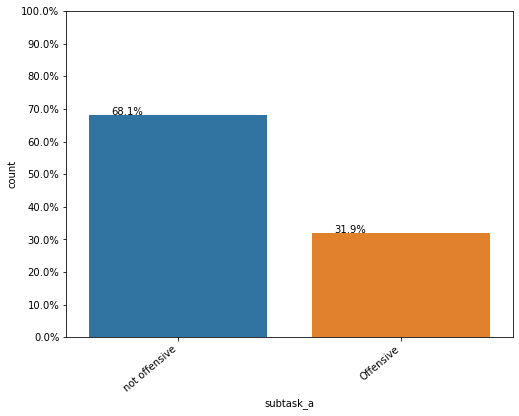

In [12]:
plt.figure(figsize=(8,6))
Y = data['subtask_a']
total = len(Y) * 1
ax=sns.countplot(x="subtask_a", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

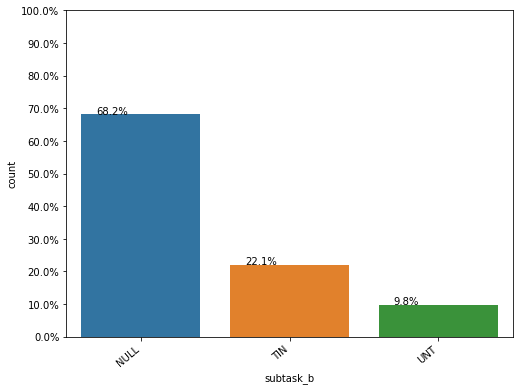

In [13]:
plt.figure(figsize=(8,6))
Y = data['subtask_b'] != 'NULL'
total = len(Y) * 1
ax=sns.countplot(x="subtask_b", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

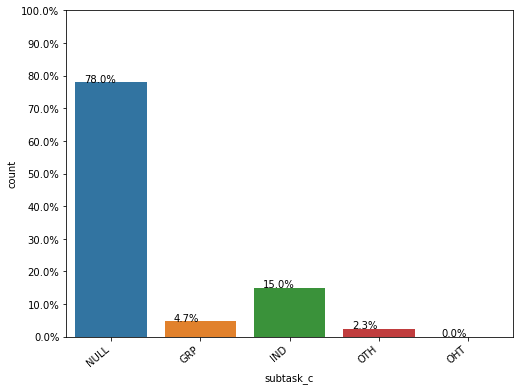

In [14]:
plt.figure(figsize=(8,6))
Y = data['subtask_c']
total = len(Y) * 1
ax=sns.countplot(x="subtask_c", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

<AxesSubplot:>

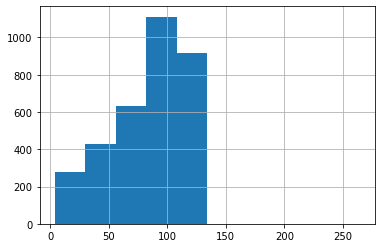

In [15]:
data['tweet'].str.len().hist()

### It is clear that the number of words in the tweets that tweets ranges from around 5 to 125 and mostly falls between 50 - 125 words

<AxesSubplot:>

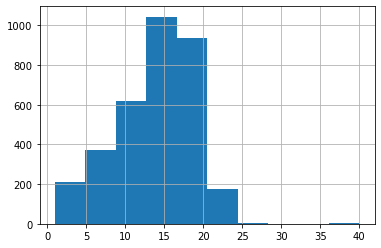

In [16]:
data['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist()

### It is clear that the number of words in tweet ranges from 1 to 25 and mostly falls between 10 to 20 words.

<AxesSubplot:>

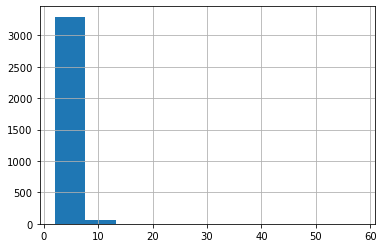

In [17]:
data['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### The average word length ranges between around 2 to 6 with 4-5 being the most common length. Does it mean that people are using really short words in tweets?

In [18]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))

There are 3362 observations and 4 features in this dataset. 



पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेजवळ सोमवारी जमलेले चिनी सैन्य भाले लोखंडी शिगा आ…


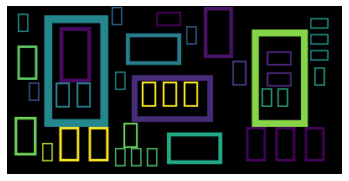

In [19]:
# word_cloud is difficult for Marathi corpus
tweet = data.tweet[0]
tweet = tweet.encode("utf-8").decode("utf-8")
print((tweet))
wordcloud = WordCloud().generate(tweet)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
font="gargi.ttf"
long_string = ','.join(list(data['tweet'].values))
#long_string = long_string.decode('utf-8')
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    font_path=font
).generate(long_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',font_step=)
# wordcloud.generate(long_string)
# wordcloud.to_image()

In [23]:
def word_clouds(tweets):
    comment_words = ""
    map_of_words = {}
    for tweet in str(tweets['tweet']):
        # comment_words += tweet + " "
        for word in tweet.split():
            if word in map_of_words:
                map_of_words[word] += 1
            else:
                map_of_words[word] = 1
    map_of_words = [(v, k) for k, v in map_of_words.items()]
    map_of_words.sort(reverse=True)  # natively sort tuples by first element
    i = 0
    for v, k in map_of_words:
        if i == 5:
            break
        i += 1
        print ("%s: %d" % (k, v))

In [24]:
word_clouds(data)

ा: 38
्: 33
.: 24
त: 22
र: 20


In [27]:
paragraphs = list(data['tweet'].values)
text = " ".join(paragraphs)
words = text.split(" ")

In [28]:
from collections import Counter 
cnt = Counter(words)

cnt.most_common(10)

[('@USER', 1213),
 ('', 919),
 ('आहे', 710),
 ('आणि', 582),
 ('नाही', 405),
 ('चांगला', 371),
 ('तर', 327),
 ('पण', 300),
 ('काय', 289),
 ('हे', 247)]

In [30]:
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
not_stop_words = [word for word in words if word not in set(STOP_WORDS_HI) ]



In [32]:
non_stop_cnt = Counter(not_stop_words)

non_stop_cnt.most_common(10)

[('@USER', 1213),
 ('', 919),
 ('आहे', 710),
 ('आणि', 582),
 ('नाही', 405),
 ('चांगला', 371),
 ('तर', 327),
 ('पण', 300),
 ('काय', 289),
 ('ते', 185)]

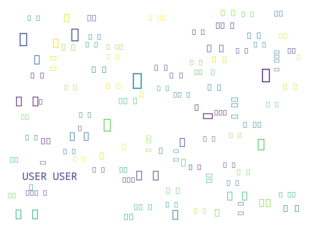

In [38]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=700,
    height=500,
    max_font_size=50, 
    max_words=100,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
font="/Users/prajwalkrishn/Desktop/My_Computer/Capstone Repo/Detect_offensive_tweets/Experiments - Prajwal/Jupyter Notebook/Gargi_2.0.tff"

wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    font_path=font
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

OSError: cannot open resource

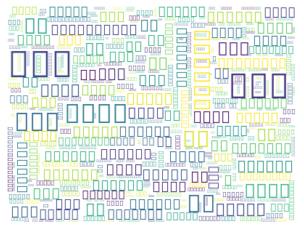

In [40]:
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    #font_path=font
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()